# Final-Project - Loan Risk Prediction

In this project, I will carry out exploratory analysis on the dataset from Lending Club for my final project

#### Project Problem and Hypothesis
While many banks and financial institutions have determined many ways on filtering who should or should not receive a loan, this project will focus on using publically available data from peer-to-peer lending company Lending Club to determine who are most likely to fulfill or default on their borrowed loans after being qualified and given a loan.

The problem I am solving is that with the data available to us can I create a model to identify those who are likely to default on their loans. To address this I will utilize a classification machine learning model in which I will determine a binary value with 0 representing current/fulfilled or 1 representing default/charged off. I will utilize a number of classification models including K Nearest Neighbors, Random Forest, and Logistic Regression on the data set to find the best fit model that returns optimal results on the test data. This study would be attractive to financial institutions such as banks, loan providers or individuals who are engaging in systems such as Lending Club to better qualify applicants looking for new loans while gaining on their investments from interest. Because this is a peer to peer lending platform it can also be useful to use an as individual who is looking to invest in a non-traditional platform/channel to grow their wealth/diversify investments.

#### Problem Statement:
Determine how likely borrowers are likely to default on their loans, using demographic data collected at registration (employment length, region, zip) and loan payment history (loan purpose, loan grade, interest rate, funded amount, term, total payment) based on data from peer-to-peer lending company Lending Club from Jan-Dec 2015. For this research question, the independent variables are the features highlight above and the dependent variable is loan status. 

##### Hypothesis: 
- H0: Borrowers who qualify for loans do not default on their loans
- H1: Borrowers who qualify for loans can default on their loans

I will train the model using data from January 2015 to June 2017 and test against recent 2016/17 observations to test the accuracy of the classification model. The model can be leveraged by financial institutions and individuals who have similar data to the data set I will be using for this problem

## Part 3: Dataset Cleaning and Exploratory Analysis

In [1]:
#imports
import pandas as pd
from pandas import Series
import numpy as np
import pylab as pl
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import datasets, neighbors, metrics
from sklearn.metrics import roc_curve, roc_auc_score, average_precision_score, recall_score, cohen_kappa_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from pandas.io.parsers import read_csv
%matplotlib inline

df_raw = pd.read_csv("Lending_Club_Data/LoanStats3d.csv")

df_raw.head()

/Users/shahrozehusain/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/shahrozehusain/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_il_6m,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog
0,NaN,NaN,3600,3600,3600,36 months,0.1399,123.03,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,35000,35000,35000,60 months,0.1485,829.90,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,29900,29900,29900,60 months,0.1288,678.49,C,C2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,8650,8650,8650,36 months,0.1989,320.99,E,E3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,18000,18000,18000,60 months,0.1199,400.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
def concatenate (outfile="Concatenated.csv"):
    fileList=glob.glob("Lending_Club_Data/*.csv")
    dFList=[]
    # Number of row to skip in each file
    skiprows=2
    skipfooter = 3
    # Header line that will be kept for column name (index 5 in Excel)
    header=1
    # File to use to assign headers to final concated file
    df_first = pd.read_csv("Lending_Club_Data/LoanStats_2017Q2.csv", skiprows = 1)
    df_first.rename(columns=lambda x: x.strip())
    colnames = df_first.columns
    for filename in fileList:
        print(filename)
        dfl= pd.read_csv(filename, skiprows = skiprows, skipfooter = skipfooter, header=None)
        dFList.append(dfl)
    concatDf= pd.concat(dFList, axis=0)
    concatDf.columns = colnames
    concatDf.reset_index(drop=True, inplace=True)
#fixing the int_rate col because it is being recognized as strings
    concatDf['int_rate'] = concatDf['int_rate'].str.replace('%', '')
    concatDf['int_rate'] = concatDf['int_rate'].astype(float)
    concatDf.to_csv(outfile)

In [3]:
concatenate()

/Users/shahrozehusain/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2827: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


Lending_Club_Data/LoanStats3d.csv


/Users/shahrozehusain/anaconda/lib/python2.7/site-packages/ipykernel_launcher.py:15: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  from ipykernel import kernelapp as app


Lending_Club_Data/LoanStats_2016Q1.csv
Lending_Club_Data/LoanStats_2016Q2.csv
Lending_Club_Data/LoanStats_2016Q3.csv
Lending_Club_Data/LoanStats_2016Q4.csv
Lending_Club_Data/LoanStats_2017Q1.csv
Lending_Club_Data/LoanStats_2017Q2.csv


In [4]:
df = pd.read_csv('Concatenated.csv')

/Users/shahrozehusain/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1,20,56,113,123,124,125,126,129,130,131,134) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.describe()

,Unnamed: 0,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,url,dti,...,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,899832.000000,0.0,899832.000000,899832.000000,899832.000000,636637.000000,899832.000000,8.998320e+05,0.0,899832.000000,...,7831.000000,7831.000000,2690.000000,435.0,435.000000,435.0,435.000000,351.000000,435.000000,435.000000
mean,449915.500000,NaN,14882.106549,14882.075432,14876.702835,13.133084,443.735858,7.892307e+04,NaN,20.873593,...,0.026816,0.068701,38.632714,3.0,191.534897,3.0,16.602299,581.237692,14064.968483,212.053931
std,259759.268051,NaN,8964.058389,8964.058972,8961.523174,4.991757,265.687090,9.838297e+04,NaN,141.971448,...,0.216900,0.321840,23.399716,0.0,135.494004,0.0,7.869939,418.447460,7646.953601,189.812616
min,0.000000,NaN,1000.000000,1000.000000,775.000000,5.320000,14.010000,0.000000e+00,NaN,-1.000000,...,0.000000,0.000000,0.000000,3.0,5.380000,3.0,0.000000,16.140000,627.960000,2.170000
25%,224957.750000,NaN,8000.000000,8000.000000,8000.000000,9.490000,251.400000,4.750000e+04,NaN,12.370000,...,0.000000,0.000000,19.000000,3.0,88.785000,3.0,11.000000,270.855000,7966.105000,74.265000
50%,449915.500000,NaN,12800.000000,12800.000000,12800.000000,12.740000,377.040000,6.558150e+04,NaN,18.270000,...,0.000000,0.000000,38.000000,3.0,154.760000,3.0,17.000000,469.110000,13059.180000,164.330000
75%,674873.250000,NaN,20000.000000,20000.000000,20000.000000,15.590000,588.142500,9.500000e+04,NaN,24.880000,...,0.000000,0.000000,57.000000,3.0,273.035000,3.0,23.000000,829.875000,18951.015000,300.590000
max,899831.000000,NaN,40000.000000,40000.000000,40000.000000,30.990000,1719.830000,6.100000e+07,NaN,29550.000000,...,6.000000,10.000000,136.000000,3.0,675.390000,3.0,31.000000,2026.170000,33585.720000,1275.360000


In [6]:
data = df[:]

def describe_categorical(data):
    from IPython.display import display, HTML
    display(HTML(data[data.columns[data.dtypes == "object"]].describe().to_html()))

In [7]:
describe_categorical(data)

,id,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status
count,2,899832,899832,899832,851266,899832,899832,899832,899832,899832,899832,68,899832,876654,899831,899832,899832,899390,899832,890410,739158,899813,899832,20520,7831,636637,435,435,435,435,435,435,435
unique,2,2,7,35,218784,12,5,3,28,8,2,51,14,26,928,50,1332,2371,2,49,6,51,3,3,502,2,1,8,3,7,8,7,4
top,Total amount funded in policy code 1: 6417608175,36 months,C,C1,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2016,Current,n,,debt_consolidation,Debt consolidation,750xx,CA,1-Oct,0%,w,Jul-2017,Aug-2017,Jul-2017,INDIVIDUAL,Not Verified,Aug-2004,N,INTEREST ONLY-3 MONTHS DEFERRAL,UNEMPLOYMENT,ACTIVE,Jun-2017,Sep-2017,Jun-2017,Late (16-30 days)
freq,1,649542,277762,64648,17348,306929,441252,367512,61992,657105,899424,18,521898,507521,9366,121572,5461,3088,636282,489414,526807,571597,876883,15475,80,636321,435,120,316,163,134,158,233


In [8]:
list(df)

['Unnamed: 0',
 'id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'application_type',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'acc_now_delinq',
 'tot_coll_a

In [9]:
#removing id related data to anonymize the data set
del df['id']
del df['Unnamed: 0']
del df['member_id']

In [10]:
df2 = df.dropna(axis='columns', how='all')
df2.to_csv('empty-columns-removed.csv')

In [11]:
df2.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount
count,899832.000000,899832.000000,899832.000000,636637.000000,899832.000000,8.998320e+05,899832.000000,899832.000000,899831.000000,509612.000000,...,7831.000000,7831.000000,2690.000000,435.0,435.000000,435.0,435.000000,351.000000,435.000000,435.000000
mean,14882.106549,14882.075432,14876.702835,13.133084,443.735858,7.892307e+04,20.873593,0.355345,0.551536,33.692380,...,0.026816,0.068701,38.632714,3.0,191.534897,3.0,16.602299,581.237692,14064.968483,212.053931
std,8964.058389,8964.058972,8961.523174,4.991757,265.687090,9.838297e+04,141.971448,0.944710,0.851026,21.932975,...,0.216900,0.321840,23.399716,0.0,135.494004,0.0,7.869939,418.447460,7646.953601,189.812616
min,1000.000000,1000.000000,775.000000,5.320000,14.010000,0.000000e+00,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.0,5.380000,3.0,0.000000,16.140000,627.960000,2.170000
25%,8000.000000,8000.000000,8000.000000,9.490000,251.400000,4.750000e+04,12.370000,0.000000,0.000000,15.000000,...,0.000000,0.000000,19.000000,3.0,88.785000,3.0,11.000000,270.855000,7966.105000,74.265000
50%,12800.000000,12800.000000,12800.000000,12.740000,377.040000,6.558150e+04,18.270000,0.000000,0.000000,30.000000,...,0.000000,0.000000,38.000000,3.0,154.760000,3.0,17.000000,469.110000,13059.180000,164.330000
75%,20000.000000,20000.000000,20000.000000,15.590000,588.142500,9.500000e+04,24.880000,0.000000,1.000000,49.000000,...,0.000000,0.000000,57.000000,3.0,273.035000,3.0,23.000000,829.875000,18951.015000,300.590000
max,40000.000000,40000.000000,40000.000000,30.990000,1719.830000,6.100000e+07,29550.000000,42.000000,6.000000,195.000000,...,6.000000,10.000000,136.000000,3.0,675.390000,3.0,31.000000,2026.170000,33585.720000,1275.360000


In [12]:
data = df2[:]
describe_categorical(data)

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,earliest_cr_line,revol_util,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type,verification_status_joint,sec_app_earliest_cr_line,hardship_flag,hardship_type,hardship_reason,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status
count,899832,899832,899832,851266,899832,899832,899832,899832,899832,899832,68,899832,876654,899831,899832,899832,899390,899832,890410,739158,899813,899832,20520,7831,636637,435,435,435,435,435,435,435
unique,2,7,35,218784,12,5,3,28,8,2,51,14,26,928,50,1332,2371,2,49,6,51,3,3,502,2,1,8,3,7,8,7,4
top,36 months,C,C1,Teacher,10+ years,MORTGAGE,Source Verified,Mar-2016,Current,n,,debt_consolidation,Debt consolidation,750xx,CA,1-Oct,0%,w,Jul-2017,Aug-2017,Jul-2017,INDIVIDUAL,Not Verified,Aug-2004,N,INTEREST ONLY-3 MONTHS DEFERRAL,UNEMPLOYMENT,ACTIVE,Jun-2017,Sep-2017,Jun-2017,Late (16-30 days)
freq,649542,277762,64648,17348,306929,441252,367512,61992,657105,899424,18,521898,507521,9366,121572,5461,3088,636282,489414,526807,571597,876883,15475,80,636321,435,120,316,163,134,158,233


In [13]:
dummy_status = pd.get_dummies(df2.loan_status)

dummy_status.head()

,Charged Off,Current,Default,Fully Paid,In Grace Period,Issued,Late (16-30 days),Late (31-120 days)
0,0,1,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [14]:
#add a column for outcomes based on loan_status data - loans that default or were charged off were valued as 1.
df2['outcome']= df2['loan_status'].apply(lambda x : 
                                        1 if x in ['Default', 'Charged Off']
                                         else 0)

In [15]:
#check to see that the outcome values were correctly assigned by loan_status
df2[['outcome', 'loan_status']]

,outcome,loan_status
0,0,Current
1,0,Fully Paid
2,0,Fully Paid
3,0,Fully Paid
4,0,Fully Paid
5,0,Fully Paid
6,0,Current
7,0,Current
8,0,Current
9,0,Fully Paid


In [16]:
print df2['outcome'].value_counts()

0    850283
1     49549
Name: outcome, dtype: int64


In [17]:
defaults = (float(49549) / (899832))*100
print ('Percentage of observations that defaulted/charged off'), defaults,"%"

Percentage of observations that defaulted/charged off 5.50647231928 %


In [18]:
def missing_values_table(df): 
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum()/len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        return mis_val_table_ren_columns 

In [19]:
missing_values_table(df2).dropna(axis="index", how="any")

,Missing Values,% of Total Values
loan_amnt,0,0.000000
funded_amnt,0,0.000000
funded_amnt_inv,0,0.000000
term,0,0.000000
int_rate,263195,29.249349
installment,0,0.000000
grade,0,0.000000
sub_grade,0,0.000000
emp_title,48566,5.397230
emp_length,0,0.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11a3b1290>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12b36be50>]], dtype=object)

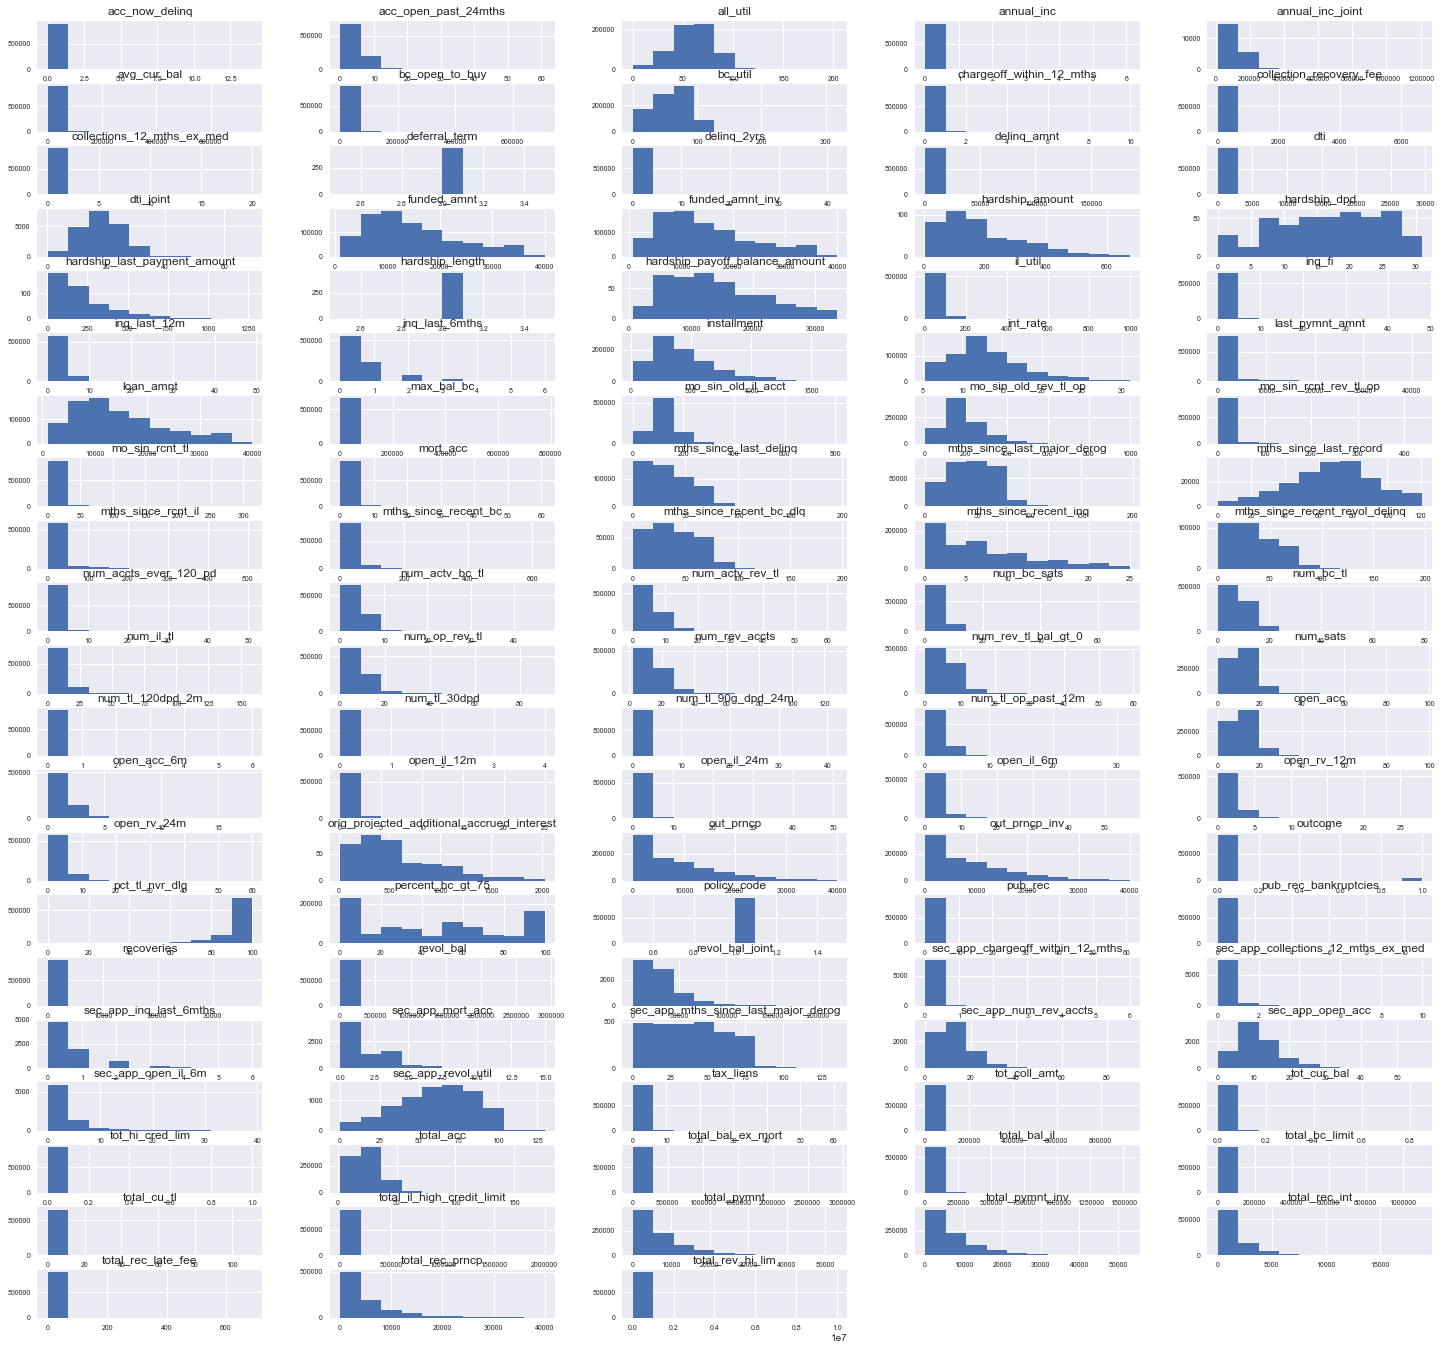

In [20]:
df2.hist(xlabelsize=7, ylabelsize=7, figsize=(25,25), layout=(22,5))

In [21]:
df2.corr()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,deferral_term,hardship_amount,hardship_length,hardship_dpd,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,outcome
loan_amnt,1.000000,0.999998,0.999992,0.137986,0.946737,0.240148,0.005230,-0.004825,-0.024066,-0.016237,...,-0.081591,0.094886,NaN,0.824479,NaN,-0.045041,0.821491,0.967855,0.566979,0.021202
funded_amnt,0.999998,1.000000,0.999994,0.137988,0.946739,0.240149,0.005230,-0.004824,-0.024065,-0.016239,...,-0.081591,0.094886,NaN,0.824479,NaN,-0.045041,0.821491,0.967855,0.566979,0.021203
funded_amnt_inv,0.999992,0.999994,1.000000,0.138023,0.946653,0.240161,0.005219,-0.004860,-0.024124,-0.016200,...,-0.081681,0.094888,NaN,0.824468,NaN,-0.044827,0.821450,0.967869,0.566782,0.021171
int_rate,0.137986,0.137988,0.138023,1.000000,0.174694,-0.062278,0.015195,0.025516,0.194151,-0.009053,...,0.093830,-0.104398,NaN,0.644174,NaN,-0.006132,0.649960,0.312245,0.126791,0.113678
installment,0.946737,0.946739,0.946653,0.174694,1.000000,0.227454,0.005224,0.001597,0.005803,-0.019267,...,-0.058160,0.066544,NaN,0.755467,NaN,-0.055578,0.751563,0.876402,0.642660,0.026125
annual_inc,0.240148,0.240149,0.240161,-0.062278,0.227454,1.000000,-0.019622,0.026423,0.022147,-0.021805,...,-0.045177,0.034551,NaN,0.347799,NaN,-0.054817,0.340626,0.468621,0.294202,-0.018914
dti,0.005230,0.005230,0.005219,0.015195,0.005224,-0.019622,1.000000,-0.002611,-0.001855,0.001331,...,-0.005187,-0.035457,NaN,0.045850,NaN,0.011350,0.090814,-0.018619,-0.020550,0.001117
delinq_2yrs,-0.004825,-0.004824,-0.004860,0.025516,0.001597,0.026423,-0.002611,1.000000,0.028988,-0.521978,...,0.027627,-0.172044,NaN,0.017852,NaN,-0.035891,0.004422,0.027107,0.040698,0.003775
inq_last_6mths,-0.024066,-0.024065,-0.024124,0.194151,0.005803,0.022147,-0.001855,0.028988,1.000000,0.018774,...,0.039080,-0.018629,NaN,0.059320,NaN,-0.013783,0.069836,0.018058,0.102050,0.064054
mths_since_last_delinq,-0.016237,-0.016239,-0.016200,-0.009053,-0.019267,-0.021805,0.001331,-0.521978,0.018774,1.000000,...,-0.026294,0.357301,NaN,0.033627,NaN,-0.010835,0.058304,0.012258,0.012358,-0.000129


In [22]:
df2.corr().to_csv('correlation_table.csv')
# using excel to analyse variable for multicollinearity

Correlation matrix
Axes(0.125,0.125;0.62x0.755)


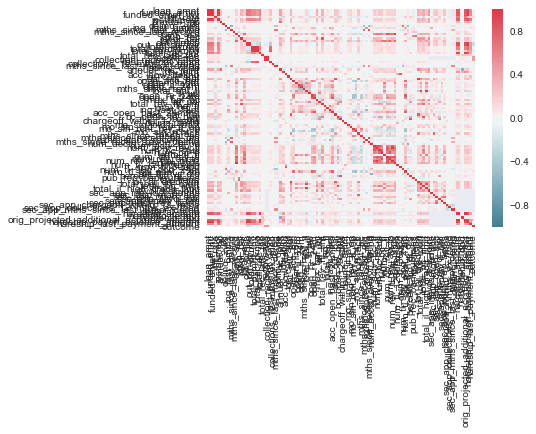

In [23]:
corr_test1 = df2.columns.values.tolist()
cmap = sns.diverging_palette(220,10, as_cmap=True)
correlations1 = df2[corr_test1].corr()
print ("Correlation matrix")
print sns.heatmap(correlations1, cmap=cmap)

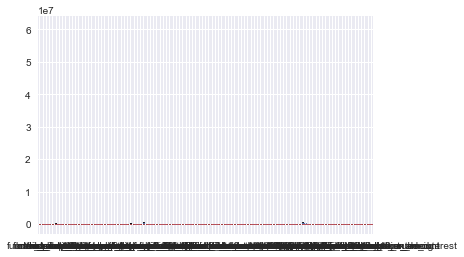

In [24]:
df2.plot(kind='box')

In [25]:
#function to show counts of outliers by variables
def outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    frame = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
    print frame.to_string()

In [26]:
#Number of outliers by variable in the data set
outliers(df2)

acc_now_delinq                                  5434
acc_open_past_24mths                           22542
addr_state                                    899832
all_util                                        3667
annual_inc                                     42604
annual_inc_joint                                 692
application_type                              899832
avg_cur_bal                                    48940
bc_open_to_buy                                 75088
bc_util                                           45
chargeoff_within_12_mths                        7627
collection_recovery_fee                        21896
collections_12_mths_ex_med                     17382
deferral_term                                      0
delinq_2yrs                                   189139
delinq_amnt                                     4403
desc                                              68
dti                                             4100
dti_joint                                     

In [27]:
focus_cols = ['outcome']
print df2.corr().filter(focus_cols).to_string()

                                             outcome
loan_amnt                                   0.021202
funded_amnt                                 0.021203
funded_amnt_inv                             0.021171
int_rate                                    0.113678
installment                                 0.026125
annual_inc                                 -0.018914
dti                                         0.001117
delinq_2yrs                                 0.003775
inq_last_6mths                              0.064054
mths_since_last_delinq                     -0.000129
mths_since_last_record                      0.011483
open_acc                                    0.013487
pub_rec                                     0.005345
revol_bal                                  -0.012488
total_acc                                   0.015796
out_prncp                                  -0.238277
out_prncp_inv                              -0.238264
total_pymnt                                -0.

### Making a new table with all the variables I will be using to use for the models

Below is the list of Variables/Features I will be using in for models. The selection based on a combination of background research on variables that best characterize loans, analysis of the previous correlations table (in excel as the plot and dataset are very large) and similar projects I looked into for strategy that highlighted certain variables. 

- outcome
- int_rate (some missing data)
- funded_amnt
- term
- acc_now_delinq
- acc_open_past_24mths
- addr_state (dummy vars)
- annual_inc
- avg_cur_bal
- chargeoff_within_12_mts
- delinq_2yrs
- dti
- emp_length (dummy vars and missing data)
- grade (dummy vars)
- loan_amnt
- mths_since_last_delinq
- num_accts_ever_120_pd
- num_tl_120dpd_2m
- num_tl_30dpd
- num_tl_90g_dpd_24m
- num_tl_op_past_12m
- open_acc
- pub_rec_bankruptcies
- purpose (dummy vars)
- term
- tot_coll_amt
- tot_cur_bal
- total_acc
- total_pymnt
- out_prncp
- total_rec_prncp
- recoveries
- collection_recovery_fee

In [28]:
dummy_grade = pd.get_dummies(df2.grade)

dummy_grade.head()

,A,B,C,D,E,F,G
0,0,0,1,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0
4,1,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11cbf7950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12743cb90>]], dtype=object)

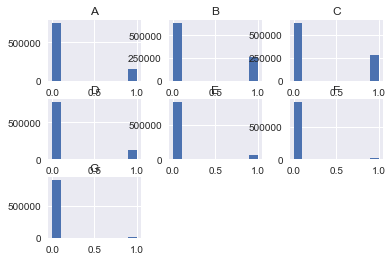

In [29]:
dummy_grade.hist()

In [30]:
dummy_state = pd.get_dummies(df2.addr_state)

dummy_state.head()

,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f9ca710>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x129dc9310>]], dtype=object)

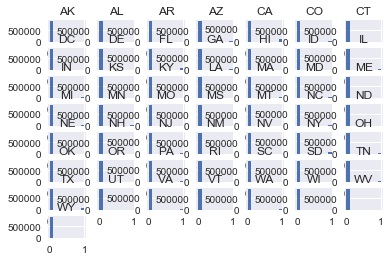

In [31]:
dummy_state.hist()

In [32]:
dummy_emp_len = pd.get_dummies(df2.emp_length)

dummy_emp_len.head()

,1 year,10+ years,2 years,3 years,4 years,5 years,6 years,7 years,8 years,9 years,< 1 year,n/a
0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x129de1dd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x149802850>]], dtype=object)

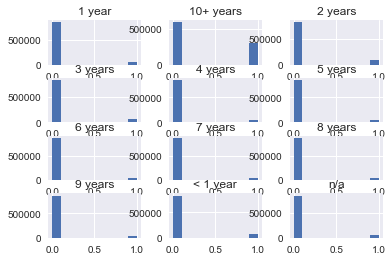

In [33]:
dummy_emp_len.hist()

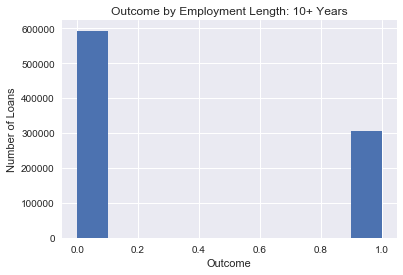

In [34]:
dummy_emp_len['10+ years'].hist()
plt.xlabel('Outcome')
plt.ylabel('Number of Loans')
plt.title('Outcome by Employment Length: 10+ Years')

In [35]:
dummy_purpose = pd.get_dummies(df2.purpose)

dummy_purpose.head()

,car,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x149b5c110>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14c09b450>]], dtype=object)

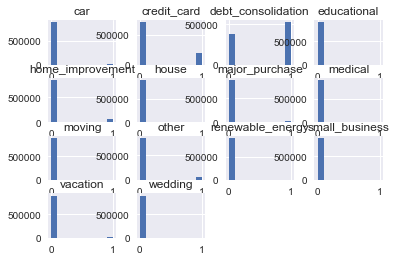

In [36]:
dummy_purpose.hist()

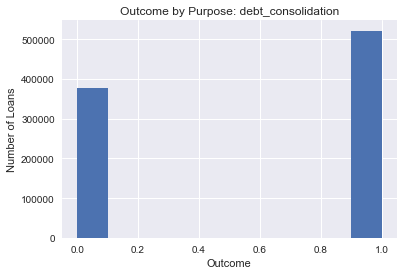

In [37]:
dummy_purpose['debt_consolidation'].hist()
plt.xlabel('Outcome')
plt.ylabel('Number of Loans')
plt.title('Outcome by Purpose: debt_consolidation')

In [38]:
dummy_term = pd.get_dummies(df2.term)

dummy_term.head()

,36 months,60 months
0,0,1
1,0,1
2,1,0
3,0,1
4,1,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14ca95b10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x14ccf6910>]], dtype=object)

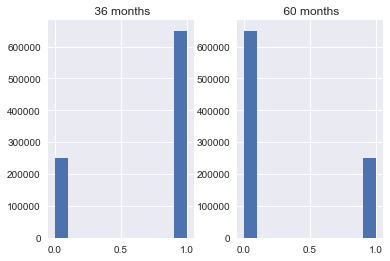

In [39]:
dummy_term.hist()

In [40]:
col = ['outcome','funded_amnt','int_rate', 'acc_now_delinq', 
       'acc_open_past_24mths', 'annual_inc', 'avg_cur_bal', 'chargeoff_within_12_mths',
      'delinq_2yrs', 'dti', 'mths_since_last_delinq', 'num_accts_ever_120_pd', 'num_tl_120dpd_2m',
      'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'open_acc', 'pub_rec_bankruptcies',
       'tot_coll_amt', 'tot_cur_bal', 'total_acc', 'total_pymnt', 'out_prncp', 'total_rec_prncp', 
       'recoveries', 'collection_recovery_fee']
data_select = df2[col]
data_select.count()

outcome                     899832
funded_amnt                 899832
int_rate                    636637
acc_now_delinq              899832
acc_open_past_24mths        899832
annual_inc                  899832
avg_cur_bal                 899830
chargeoff_within_12_mths    899832
delinq_2yrs                 899832
dti                         899832
mths_since_last_delinq      509612
num_accts_ever_120_pd       899832
num_tl_120dpd_2m            862340
num_tl_30dpd                899832
num_tl_90g_dpd_24m          899832
num_tl_op_past_12m          899832
open_acc                    899832
pub_rec_bankruptcies        899832
tot_coll_amt                899832
tot_cur_bal                 899832
total_acc                   899832
total_pymnt                 899832
out_prncp                   899832
total_rec_prncp             899832
recoveries                  899832
collection_recovery_fee     899832
dtype: int64

In [41]:
#To replace NaN values in the columns, mean datapoints were used
df_zero = data_select.fillna(data_select.mean(), inplace=True)
df_zero.count()

/Users/shahrozehusain/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:3549: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


outcome                     899832
funded_amnt                 899832
int_rate                    899832
acc_now_delinq              899832
acc_open_past_24mths        899832
annual_inc                  899832
avg_cur_bal                 899832
chargeoff_within_12_mths    899832
delinq_2yrs                 899832
dti                         899832
mths_since_last_delinq      899832
num_accts_ever_120_pd       899832
num_tl_120dpd_2m            899832
num_tl_30dpd                899832
num_tl_90g_dpd_24m          899832
num_tl_op_past_12m          899832
open_acc                    899832
pub_rec_bankruptcies        899832
tot_coll_amt                899832
tot_cur_bal                 899832
total_acc                   899832
total_pymnt                 899832
out_prncp                   899832
total_rec_prncp             899832
recoveries                  899832
collection_recovery_fee     899832
dtype: int64

In [42]:
df3 = df_zero.join(dummy_grade.loc[:])
df4 = df3.join(dummy_state.loc[:])
df5 = df4.join(dummy_emp_len.loc[:])
df6 = df5.join(dummy_purpose.loc[:])
df_final = df6.join(dummy_term.loc[:])

df_final.head()

,outcome,funded_amnt,int_rate,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,chargeoff_within_12_mths,delinq_2yrs,dti,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,36 months,60 months
0,0,35000,13.133084,0,2,110000.0,23192.0,0,0,17.06,...,0,0,0,0,0,0,0,0,0,1
1,0,29900,13.133084,0,7,65000.0,15732.0,0,0,21.77,...,0,0,0,0,0,0,0,0,0,1
2,0,8650,13.133084,0,17,55000.0,1051.0,0,0,25.49,...,0,0,0,0,0,0,0,0,1,0
3,0,18000,13.133084,0,5,112000.0,17089.0,0,0,8.68,...,0,0,0,0,0,0,0,0,0,1
4,0,28000,13.133084,0,1,92000.0,13819.0,0,0,21.60,...,0,0,0,0,0,0,0,0,1,0


### The Data Set Prepared for Analysis

Variable | Description | Type of Variable
---| ---| ---
loan_status | Current status of the loan. Statuses include: Fullfilled, Current, Late, In Grade period, Default, Charged Off | Categorical
outcome | 1 = Default/Charged Off, 0 = Fullfilled, Current, Late, In Grade period | Categorical
int_rate | Interest Rate on the loan | Continuous
funded_amnt | The total amount committed to that loan at that point in time. | Continuous
purpose | A category provided by the borrower for the loan request. | Categorical
term | The number of payments on the loan. Values are in months and can be either 36 or 60. | Continuous
acc_now_delinq | The number of accounts on which the borrower is now delinquent. | Continuous
acc_open_past_24mths | Number of trades opened in past 24 months. | Continuous
addr_state | The state provided by the borrower in the loan application | Categorical
annual_inc | The self-reported annual income provided by the borrower during registration. | Continuous
avg_cur_bal | Average current balance of all accounts | Continuous
chargeoff_within_12_mts | Number of charge-offs within 12 months | Continuous
delinq_2yrs | The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years |Continuous
dti | A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income. | Continuous
emp_length | Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. | Categorical
grade | LC assigned loan grade. Credit Grade is the letter (A-G or AA-HR) that is assigned to a borrower and corresponds with the interest rate that is charged for the loan.| Categorical
loan_amnt | The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value. | Continuous
mths_since_last_delinq | The number of months since the borrower's last delinquency. | Continuous
num_accts_ever_120_pd | Number of accounts ever 120 or more days past due | Continuous 
num_tl_120dpd_2m | Number of accounts currently 120 days past due (updated in past 2 months) | Continuous
num_tl_30dpd | Number of accounts currently 30 days past due (updated in past 2 months) | Continuous
num_tl_90g_dpd_24m | Number of accounts 90 or more days past due in last 24 months | Continuous
num_tl_op_past_12m | Number of accounts opened in past 12 months | Continuous
open_acc | The number of open credit lines in the borrower's credit file. | Continuous
pub_rec_bankruptcies | Number of public record bankruptcies | Continuous
tot_coll_amt | Total collection amounts ever owed | Continuous
tot_cur_bal | Total current balance of all accounts | Continuous
total_acc | The total number of credit lines currently in the borrower's credit file | Continuous
total_pymnt | Payments received to date for total amount funded | Continuous
out_prncp | Remaining outstanding principal for total amount funded | Continuous
total_rec_prncp | Principal received to date | Continuous
recoveries | post charge off gross recovery | Continuous
collection_recovery_fee | post charge off collection fee | Continuous

There were 899,832 loan status outcomes in the dataset that were converted into binary outcomes for the project with 1 = default/charged off and 0 = fulfilled, current, late and in grace period. For the analysis and modeling I selected 25 variables based on a combination of background research on variables that best characterize loans, analysis of the previous correlations table (in excel as the plot and dataset are very large) and similar projects I looked into for strategy that highlighted certain variables. I dropped id related columns as they were missing many data points and I wished to to anonymize the dataset. There were 262745 observations with missing data from columns used in the model for the variables int_rate, mths_since_last_delinq and num_tl_120dpd_2m that were replaced with mean values. The final analytic sample was 899,832. The time frame relevant for this data is from January 2015 to June 2017.

For this research question, the independent variables are listed above in the data dictionary; the dependent variable is loan status. There were 20 variables with continous data including $ Dollar amount, time in months and percentage as well as 5 categorical variables used for the analysis including employment length, loan grade, loan purpose, loan term length and borrowers home state. The final outcome of loan status is categorical, those who who's loans defaulted/charged off were labeled 1 and those who did not default/charged off were labeled 0.

The assumptions for the distribution of dataset are that it is cross-sectional data taken from Jan 2015 to June 2017 of all borrowers who received loans through Lending Club. The second assumption is that the dataset will change going forward as different loans are issued and hence I can test the model against newer data. The third assumption is that people who provided details about salaries and jobs are assumed to still be in the same job position and not have been laid off or changed jobs. 

The issues with the data set prior to scrubbing is that there are some missing data points for certain columns as well as outliers that can affect the accuracy of the model. The data is very detailed but one thing that would have been interesting is seeing how long it took people to pay back their loans after taking the loan. Also lenders have their own criteria for choosing loans they want to provide and could be subjective thus affecting the outcome of this project. Finally, I am not sure if and how the data provided by borrowers were accurate or not so that may be an issue.

The aim is to see who is likely to default on their loan payments based on prior data of those who have defaulted/charged off on their loans. The cost of the project being wrong is a financial loss. As a lender using this model to make decisions, a wrong prediction can lead one to lose out on making additional money from the interest or people who would be able to pay back loans are not provided loans. The benefit of the model being right is to allow investors/banks to better understand and make safer loans to people who are able to pay them back and not have to be charged off and lose out on the loans

In regards to additional data points, I would have been great to have access to data from dedicated financial institutions to potentially have a dataset to compare against and see if it is applicable to systems such as bank loans as well. 

#### Data Cleaning:
For anaysis I did drop data points with missing data

- concatenated data from 2015 to Q2 2017 into 1 file
- had to edit the interest rate col and convert string into float data by  removing percentage symbol and converting to float
- removed ID cols
- dropped whole cols with NA
- created an outcome column that is binary represention for loan_status with 1 presenting default/chargedoff and 0 presenting fulfilled, current, late and in grace period 
- Selected specific variables for the model based on background research, analysis on similar projects and by analysing which variables correlated with the outcome
- created Dummy Variables for the columns with categorical data such as state, term, purpose, loan grade and employment length
- used fillna mean to replace any remaining missing observations

### Methods used in my analysis

Answer:

Analysis Methods
1. For initial exploratory analysis we should first perform a 'count' function to see if there are any missing data points. 
2. Next to to determine the skewness of the data, one should create histograms to see the distribution of each of the variables to determine if the distributions are normal or skewed showing bias and variance in the data.
3. The data should be tested for outliers, in order to perform this, we can used the boxplot function for the features to identify if any outliers are present in the dataset. outliers can be identified by circles outside the boxplots.
4. Finally in order to test for collinearity amongst two or more of the features, we can use the collinear function ".corr" to see the collinearity between predictors. Severe multicollinearity is a problem because it can can make choosing the correct predictors to include in the model more difficult and interfere in determining the precise effect of each predictor.
5. The collinear function will also aid in showing which of the variables are most correlated with the outcomes to enable us to identify the best variables to use in the model
6. Depending on the sleekness of the data one may have to normalize some of the features in the data set to ensure certain features are not overpowering the other features and a greatly affecting the model.
7. Segment the data into training and test data
8. Import classifiction models and fit to data then test to check performance

### Exploratory Analysis

In [43]:
df_final.count()

outcome                     899832
funded_amnt                 899832
int_rate                    899832
acc_now_delinq              899832
acc_open_past_24mths        899832
annual_inc                  899832
avg_cur_bal                 899832
chargeoff_within_12_mths    899832
delinq_2yrs                 899832
dti                         899832
mths_since_last_delinq      899832
num_accts_ever_120_pd       899832
num_tl_120dpd_2m            899832
num_tl_30dpd                899832
num_tl_90g_dpd_24m          899832
num_tl_op_past_12m          899832
open_acc                    899832
pub_rec_bankruptcies        899832
tot_coll_amt                899832
tot_cur_bal                 899832
total_acc                   899832
total_pymnt                 899832
out_prncp                   899832
total_rec_prncp             899832
recoveries                  899832
collection_recovery_fee     899832
A                           899832
B                           899832
C                   

In [44]:
df_final.describe()

,outcome,funded_amnt,int_rate,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,chargeoff_within_12_mths,delinq_2yrs,dti,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,36 months,60 months
count,899832.000000,899832.000000,899832.000000,899832.000000,899832.000000,8.998320e+05,899832.000000,899832.000000,899832.000000,899832.000000,...,899832.000000,899832.000000,899832.000000,899832.000000,899832.000000,899832.000000,899832.000000,899832.000000,899832.000000,899832.000000
mean,0.055065,14882.075432,13.133084,0.006447,4.700476,7.892307e+04,13401.591532,0.009438,0.355345,20.873593,...,0.021780,0.011853,0.007142,0.059030,0.000639,0.010004,0.007415,0.000008,0.721848,0.278152
std,0.228107,8964.058972,4.198736,0.086954,3.250596,9.838297e+04,16071.837999,0.111030,0.944710,141.971448,...,0.145963,0.108226,0.084211,0.235681,0.025271,0.099519,0.085789,0.002789,0.448089,0.448089
min,0.000000,1000.000000,5.320000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8000.000000,10.990000,0.000000,2.000000,4.750000e+04,3168.000000,0.000000,0.000000,12.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,12800.000000,13.133084,0.000000,4.000000,6.558150e+04,7376.000000,0.000000,0.000000,18.270000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.000000,20000.000000,13.990000,0.000000,6.000000,9.500000e+04,18473.000000,0.000000,0.000000,24.880000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,40000.000000,30.990000,14.000000,61.000000,6.100000e+07,752994.000000,10.000000,42.000000,29550.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x14d1f3b50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x152f32110>]], dtype=object)

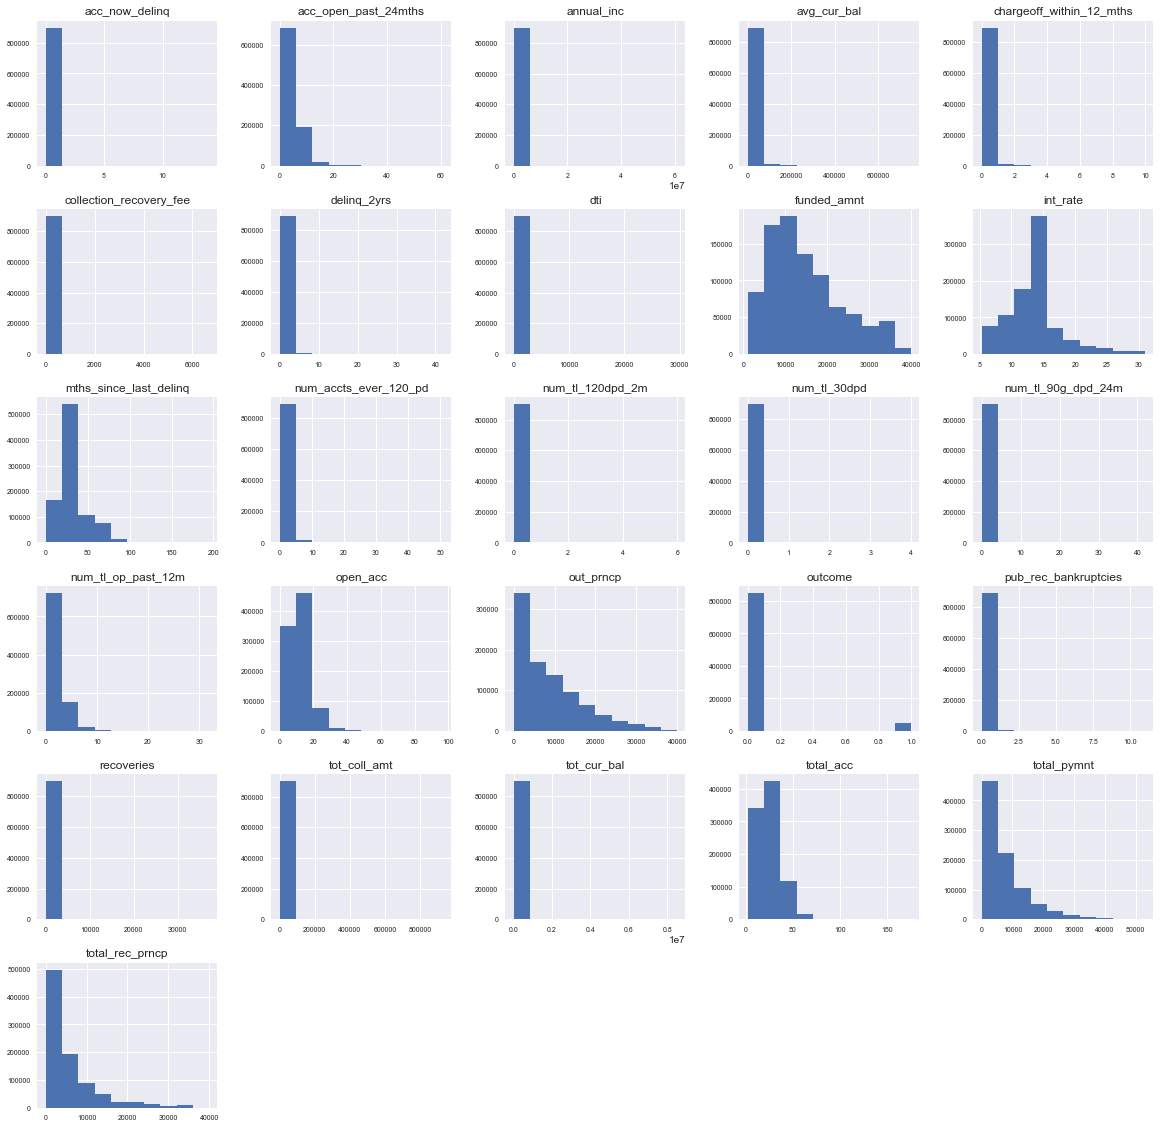

In [45]:
df_final.hist(col, xlabelsize=7, ylabelsize=7, figsize=(20,20))

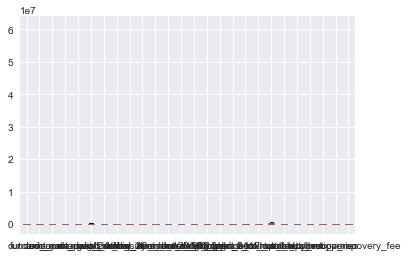

In [46]:
#overall boxplot of features to be used in the model - followed by individual graphs below
df_final[col].plot(kind='box')

In [47]:
#function that shows the number of outliers by feature
outliers(df_final)

outcome                      49549
funded_amnt                   6908
int_rate                    113857
acc_now_delinq                5434
acc_open_past_24mths         22542
annual_inc                   42604
avg_cur_bal                  48940
chargeoff_within_12_mths      7627
delinq_2yrs                 189139
dti                           4100
mths_since_last_delinq      255388
num_accts_ever_120_pd       221878
num_tl_120dpd_2m             38299
num_tl_30dpd                  3592
num_tl_90g_dpd_24m           53287
num_tl_op_past_12m           26480
open_acc                     24152
pub_rec_bankruptcies        114200
tot_coll_amt                150890
tot_cur_bal                  32300
total_acc                    21029
total_pymnt                  47644
out_prncp                    16703
total_rec_prncp              65254
recoveries                   21911
collection_recovery_fee      21896
A                           149348
B                                0
C                   

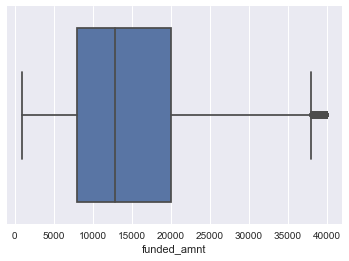

In [48]:
sns.boxplot(x=df_final['funded_amnt'])

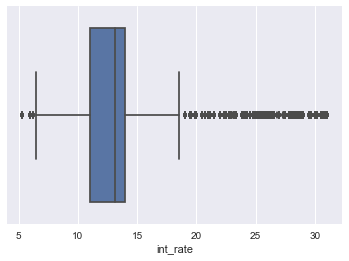

In [49]:
sns.boxplot(x=df_final['int_rate'])

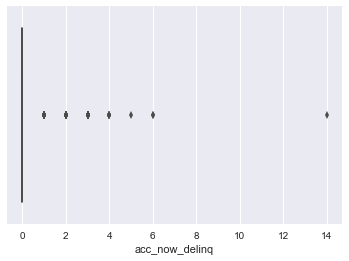

In [50]:
sns.boxplot(x=df_final['acc_now_delinq'])

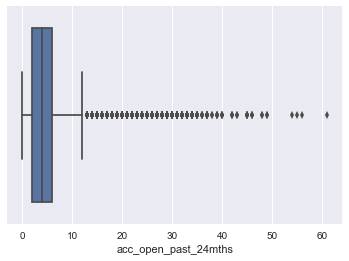

In [51]:
sns.boxplot(x=df_final['acc_open_past_24mths'])

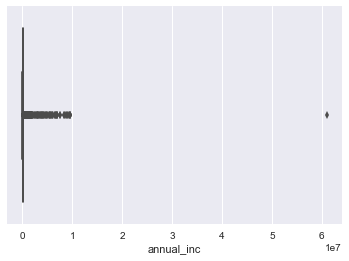

In [52]:
sns.boxplot(x=df_final['annual_inc'])

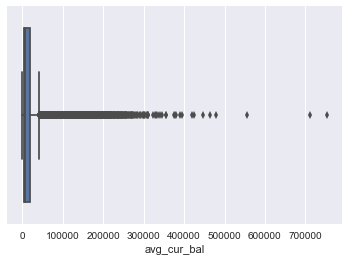

In [53]:
sns.boxplot(x=df_final['avg_cur_bal'])

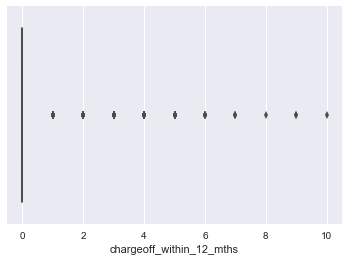

In [54]:
sns.boxplot(x=df_final['chargeoff_within_12_mths'])

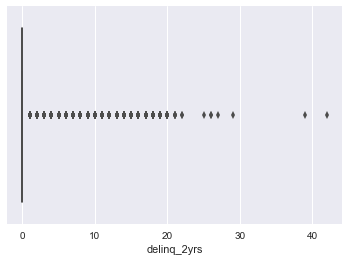

In [55]:
sns.boxplot(x=df_final['delinq_2yrs'])

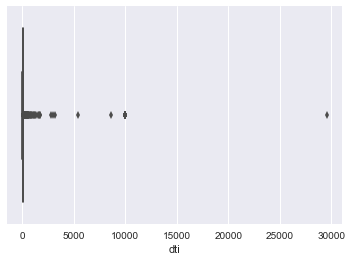

In [56]:
sns.boxplot(x=df_final['dti'])

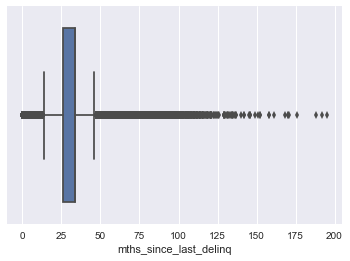

In [57]:
sns.boxplot(x=df_final['mths_since_last_delinq'])

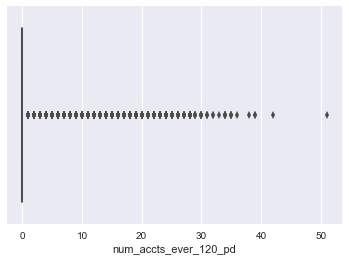

In [58]:
sns.boxplot(x=df_final['num_accts_ever_120_pd'])

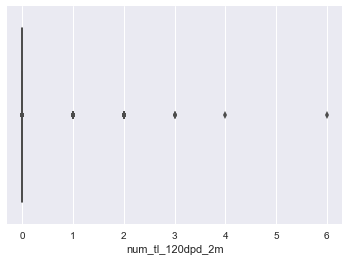

In [59]:
sns.boxplot(x=df_final['num_tl_120dpd_2m'])

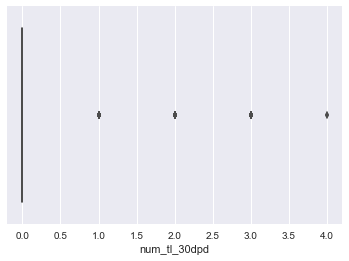

In [60]:
sns.boxplot(x=df_final['num_tl_30dpd'])

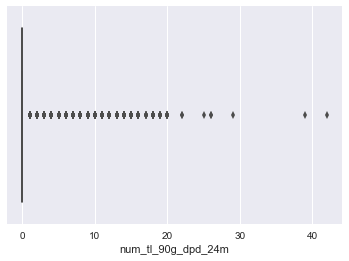

In [61]:
sns.boxplot(x=df_final['num_tl_90g_dpd_24m'])

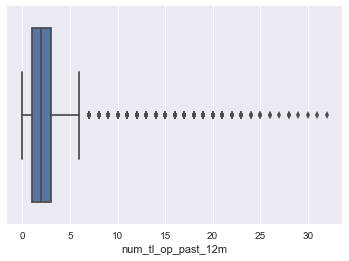

In [62]:
sns.boxplot(x=df_final['num_tl_op_past_12m'])

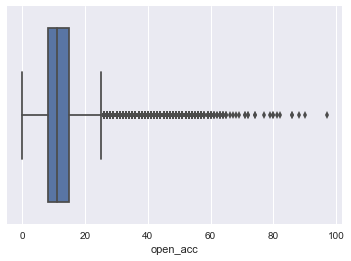

In [63]:
sns.boxplot(x=df_final['open_acc'])

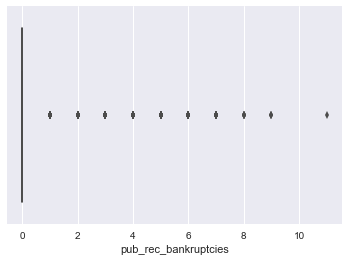

In [64]:
sns.boxplot(x=df_final['pub_rec_bankruptcies'])

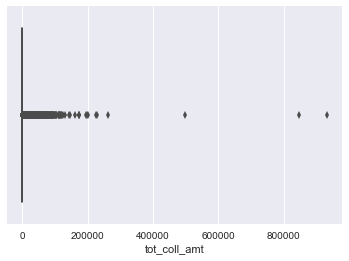

In [65]:
sns.boxplot(x=df_final['tot_coll_amt'])

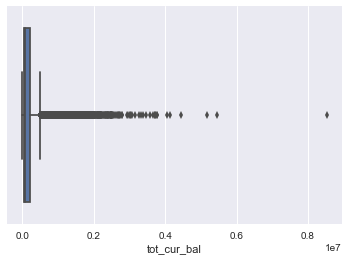

In [66]:
sns.boxplot(x=df_final['tot_cur_bal'])

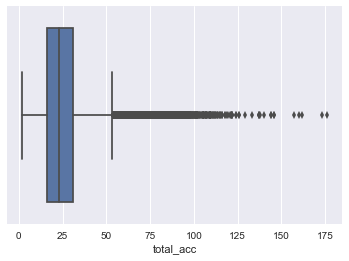

In [67]:
sns.boxplot(x=df_final['total_acc'])

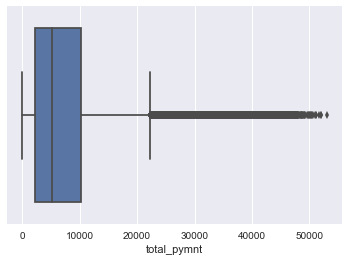

In [68]:
sns.boxplot(x=df_final['total_pymnt'])

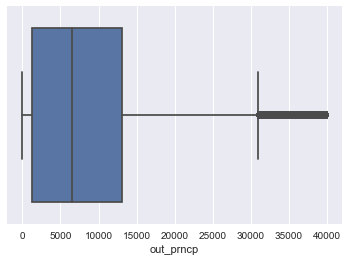

In [69]:
sns.boxplot(x=df_final['out_prncp'])

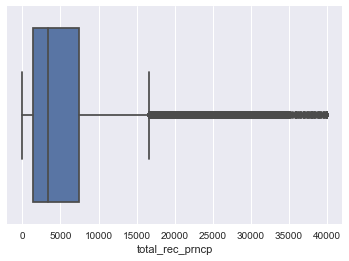

In [70]:
sns.boxplot(x=df_final['total_rec_prncp'])

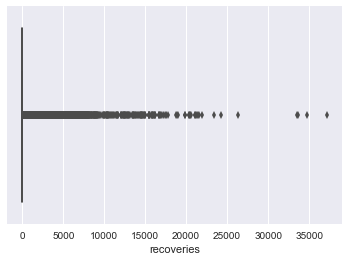

In [71]:
sns.boxplot(x=df_final['recoveries'])

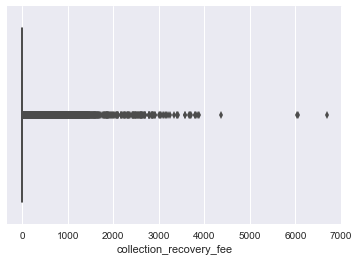

In [72]:
sns.boxplot(x=df_final['collection_recovery_fee'])

Correlation matrix
Axes(0.125,0.125;0.62x0.755)


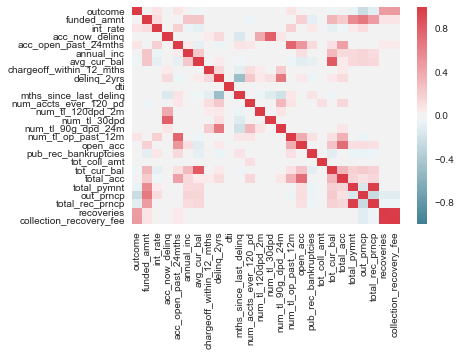

In [73]:
corr_test = df_final[col].columns.values.tolist()
cmap = sns.diverging_palette(220,10, as_cmap=True)
correlations = df_final[corr_test].corr()
print ("Correlation matrix")
print sns.heatmap(correlations, cmap=cmap)

In [74]:
df_final.corr().to_csv('df_finalcorr.csv')
df_final.corr()

,outcome,funded_amnt,int_rate,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,chargeoff_within_12_mths,delinq_2yrs,dti,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,36 months,60 months
outcome,1.000000,0.021203,7.047555e-02,0.003618,0.074514,-0.018914,-0.042357,3.481181e-03,0.003775,0.001117,...,-0.002575,0.001381,0.005039,-0.002106,0.001993,0.010491,-0.002351,-0.000673,-0.055058,0.055058
funded_amnt,0.021203,1.000000,1.183000e-01,0.000312,0.000423,0.240149,0.237301,-3.131605e-03,-0.004824,0.005230,...,-0.042020,-0.068869,-0.064549,-0.133259,-0.012838,0.010919,-0.083594,-0.000572,-0.386731,0.386731
int_rate,0.070476,0.118300,1.000000e+00,0.005935,0.184110,-0.058008,-0.080550,5.185761e-03,0.021548,0.015187,...,-0.011356,0.000408,0.019192,0.045085,0.006782,0.038944,-0.004883,-0.000032,-0.305497,0.305497
acc_now_delinq,0.003618,0.000312,5.935341e-03,1.000000,-0.007059,0.010541,0.016775,4.296416e-02,0.128503,-0.000212,...,0.002509,0.002744,0.000997,0.003718,0.001160,0.002564,-0.001045,-0.000207,0.002925,-0.002925
acc_open_past_24mths,0.074514,0.000423,1.841101e-01,-0.007059,1.000000,0.043621,-0.080502,4.892371e-03,-0.055624,0.005529,...,-0.011990,-0.003795,-0.011798,-0.015095,-0.000782,-0.011009,0.008123,-0.000478,-0.023123,0.023123
annual_inc,-0.018914,0.240149,-5.800810e-02,0.010541,0.043621,1.000000,0.225893,4.992104e-03,0.026423,-0.019622,...,0.001733,-0.005530,-0.007063,-0.012304,-0.001578,0.018458,-0.007562,0.000532,-0.044583,0.044583
avg_cur_bal,-0.042357,0.237301,-8.054963e-02,0.016775,-0.080502,0.225893,1.000000,5.688752e-03,0.041540,-0.007401,...,-0.006024,-0.006074,-0.020970,-0.014580,-0.000515,0.002914,-0.012901,-0.000275,-0.081308,0.081308
chargeoff_within_12_mths,0.003481,-0.003132,5.185761e-03,0.042964,0.004892,0.004992,0.005689,1.000000e+00,0.139112,-0.000034,...,0.000413,0.001603,-0.000079,0.003723,0.000623,0.000506,0.000937,-0.000237,0.001929,-0.001929
delinq_2yrs,0.003775,-0.004824,2.154776e-02,0.128503,-0.055624,0.026423,0.041540,1.391124e-01,1.000000,-0.002611,...,-0.000516,0.005270,0.004836,0.012614,-0.000155,0.004719,0.001565,-0.000627,0.007556,-0.007556
dti,0.001117,0.005230,1.518665e-02,-0.000212,0.005529,-0.019622,-0.007401,-3.390147e-05,-0.002611,1.000000,...,-0.003824,-0.000528,-0.000257,-0.002631,-0.000615,-0.002993,-0.001515,-0.000158,-0.008130,0.008130


In [75]:
df_final.cov()

,outcome,funded_amnt,int_rate,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,chargeoff_within_12_mths,delinq_2yrs,dti,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,36 months,60 months
outcome,5.203266e-02,4.335441e+01,6.749864e-02,7.175741e-05,0.055250,-4.244669e+02,-1.552829e+02,8.816690e-05,0.000813,0.036186,...,-8.574771e-05,3.409492e-05,9.679487e-05,-1.132134e-04,1.148858e-05,2.381640e-04,-4.599956e-05,-4.283616e-07,-5.627557e-03,5.627557e-03
funded_amnt,4.335441e+01,8.035435e+07,4.452541e+03,2.435795e-01,12.328207,2.117899e+08,3.418764e+07,-3.116826e+00,-40.850839,6656.363053,...,-5.498015e+01,-6.681320e+01,-4.872615e+01,-2.815308e+02,-2.908039e+00,9.740531e+00,-6.428547e+01,-1.430772e-02,-1.553381e+03,1.553381e+03
int_rate,6.749864e-02,4.452541e+03,1.762938e+01,2.166972e-03,2.512808,-2.396222e+04,-5.435602e+03,2.417530e-03,0.085471,9.052774,...,-6.959368e-03,1.852789e-04,6.786038e-03,4.461417e-02,7.195873e-04,1.627295e-02,-1.758756e-03,-3.770168e-07,-5.747635e-01,5.747635e-01
acc_now_delinq,7.175741e-05,2.435795e-01,2.166972e-03,7.560978e-03,-0.001995,9.017915e+01,2.344295e+01,4.147975e-04,0.010556,-0.002618,...,3.184644e-05,2.582582e-05,7.297682e-06,7.620043e-05,2.548383e-06,2.218892e-05,-7.793436e-06,-5.015088e-08,1.139762e-04,-1.139762e-04
acc_open_past_24mths,5.525049e-02,1.232821e+01,2.512808e+00,-1.995334e-03,10.566372,1.395014e+04,-4.205667e+03,1.765726e-03,-0.170815,2.551773,...,-5.688773e-03,-1.335007e-03,-3.229452e-03,-1.156462e-02,-6.420526e-05,-3.561433e-03,2.265339e-03,-4.337853e-06,-3.367942e-02,3.367942e-02
annual_inc,-4.244669e+02,2.117899e+08,-2.396222e+04,9.017915e+01,13950.143151,9.679208e+09,3.571804e+08,5.453112e+01,2455.885295,-274071.264773,...,2.487943e+01,-5.888129e+01,-5.851685e+01,-2.852970e+02,-3.922854e+00,1.807184e+02,-6.382175e+01,1.460913e-01,-1.965415e+03,1.965415e+03
avg_cur_bal,-1.552829e+02,3.418764e+07,-5.435602e+03,2.344295e+01,-4205.667196,3.571804e+08,2.583040e+08,1.015134e+01,630.704177,-16886.525982,...,-1.413173e+01,-1.056464e+01,-2.838070e+01,-5.522554e+01,-2.092383e-01,4.660277e+00,-1.778803e+01,-1.232247e-02,-5.855487e+02,5.855487e+02
chargeoff_within_12_mths,8.816690e-05,-3.116826e+00,2.417530e-03,4.147975e-04,0.001766,5.453112e+01,1.015134e+01,1.232769e-02,0.014592,-0.000534,...,6.696455e-06,1.925886e-05,-7.343379e-07,9.741717e-05,1.747999e-06,5.595791e-06,8.920347e-06,-7.342379e-08,9.595610e-05,-9.595610e-05
delinq_2yrs,8.134857e-04,-4.085084e+01,8.547112e-02,1.055603e-02,-0.170815,2.455885e+03,6.307042e+02,1.459169e-02,0.892478,-0.350244,...,-7.118628e-05,5.388655e-04,3.847348e-04,2.808447e-03,-3.693473e-06,4.436192e-04,1.268424e-04,-1.652995e-06,3.198773e-03,-3.198773e-03
dti,3.618559e-02,6.656363e+03,9.052774e+00,-2.618004e-03,2.551773,-2.740713e+05,-1.688653e+04,-5.343926e-04,-0.350244,20155.892080,...,-7.923459e-02,-8.108523e-03,-3.069744e-03,-8.801643e-02,-2.208032e-03,-4.228350e-02,-1.844793e-02,-6.252857e-05,-5.172051e-01,5.172051e-01


In [76]:
focus_cols = ['outcome']
print df_final.corr().filter(focus_cols).to_string()

                           outcome
outcome                   1.000000
funded_amnt               0.021203
int_rate                  0.070476
acc_now_delinq            0.003618
acc_open_past_24mths      0.074514
annual_inc               -0.018914
avg_cur_bal              -0.042357
chargeoff_within_12_mths  0.003481
delinq_2yrs               0.003775
dti                       0.001117
mths_since_last_delinq   -0.000102
num_accts_ever_120_pd     0.000443
num_tl_120dpd_2m          0.001805
num_tl_30dpd              0.001275
num_tl_90g_dpd_24m        0.003561
num_tl_op_past_12m        0.071849
open_acc                  0.013487
pub_rec_bankruptcies      0.013112
tot_coll_amt             -0.000810
tot_cur_bal              -0.039297
total_acc                 0.015796
total_pymnt              -0.067683
out_prncp                -0.238277
total_rec_prncp          -0.110580
recoveries                0.466850
collection_recovery_fee   0.469935
A                        -0.077033
B                   

In [77]:
#data means by admission status
df_final.groupby(['outcome']).mean()

,funded_amnt,int_rate,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,chargeoff_within_12_mths,delinq_2yrs,dti,mths_since_last_delinq,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,36 months,60 months
outcome,,,,,,,,,,,,,,,,,,,,,
0,14836.194655,13.061652,0.006371,4.642006,79372.270159,13565.923186,0.009345,0.354484,20.835299,33.692785,...,0.021870,0.011817,0.00704,0.059150,0.000627,0.009752,0.007463,0.000008,0.727804,0.272196
1,15669.410079,14.358888,0.007750,5.703849,71214.569261,10581.586853,0.011040,0.370118,21.530738,33.685433,...,0.020222,0.012473,0.00890,0.056974,0.000848,0.014329,0.006579,0.000000,0.619649,0.380351


In [78]:
#data counts by admission status
df_final.groupby(['outcome']).count()

,funded_amnt,int_rate,acc_now_delinq,acc_open_past_24mths,annual_inc,avg_cur_bal,chargeoff_within_12_mths,delinq_2yrs,dti,mths_since_last_delinq,...,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,36 months,60 months
outcome,,,,,,,,,,,,,,,,,,,,,
0,850283,850283,850283,850283,850283,850283,850283,850283,850283,850283,...,850283,850283,850283,850283,850283,850283,850283,850283,850283,850283
1,49549,49549,49549,49549,49549,49549,49549,49549,49549,49549,...,49549,49549,49549,49549,49549,49549,49549,49549,49549,49549


### Insights from exploratory analysis of data set and its impact on hypothesis

#### Distribution:
In this Lending Club data set, from the histograms of variables in 'df2', we see that almost all data sets are skewed, charts for all variables excpet the following are skewed charts are skewed to the right while the one below have their distribution descriptions in brackets.
Total Account (normal)
Gvol balance (normal)
Recoveries (left skewed
Revol_bal_joint (normal)
Mths_since_recent_revol_delinq (normal, slightly right skewed)
Inq_fi (normal)
Int_rate (normal, slightly right skewed)
In the finalized data set of focused variables that we used in the model - 'df_final' almost all variables were skewed right expect int_rate. The outcome column is right skewed showing a lower number of loans had defaulted/charged off than those in positive loan statuses of current, fulfilled, late payment and in grace period.

Other notable learnings include insights from dummy vars such as
- The assigned loan grade is not a good indiciator if a loan is risky and if a borrower will default. Based on the historgams of dummy variables by outcome, we see that multiple Grade A, B and C rated loans defaulted or were charged off. It shows that the loan grade system that Lending Club utilizes is not a good indiciator if someone will default or not – usually a bad loan grade of E and below would be considered risky loans however the historgrams of the data shows that loans graded with B and C defaulted or charged off a lot more than those graded lower. The impact of this finding is significant because most people who utilize the platform as investors, rely on the loan grades to invest their money into high grade loans.
- In regards to loan payback term periods, those who opt in for the shorter pay back term of 36 months were heavily skewd left showing that are borrowers were likely to default or be charged off in the period vs those who took loans and paid back over 60 months.
- In regards to employment rate, job stability was not a good indicator for judging if a loan was risker because borrowers who reported being employed for over 10 years were more likely to default.
- In regards to loan purpose, debt consolidation was the primary reason given by those who defaulted or charged off.

#### Outliers:
In the dataset 'df2', all variables except for the variables below have outliers in their data sets as displayed by the circles outside the boxplots and the outlier function I put together that shows the number of outliers by variable in the dataset.

- sec_app_revol_util
- percent_bc_gt_75                            
- policy_code
- hardship_payoff_balance_amount
- hardship_length
- hardship_dpd
- deferral_term

In the final dataset - 'df_final'of 25 variables - All variables except for loan payback terms had outliers in the dataset

#### Correlation:
Due to the size of the dataset and the large number of variables. I created a correlation table and exported it as a csv file to analyze in excel. Based on the analysis of the table there are significant number of variables that correlated with one another. To highlight the correlation I created another version of the file with color coded cells via conditional formatting to hightlight the following conditions. 
- cells with over 0.25 correlation - Red
- cells with 0ver 0.5 correlation - Yellow
- cells with over 0.75 correlationv- Green

The color coded correlation table can be observed in the repo folder under the name 'correlation_table(color coded).csv

There is high correlation between a number of variables, examples include 
- out_prncp and out_prncp_inv
- total_pymnt and total_pymnt_inv
As you can see from the excel there are many highly collinear variables that report often the same numbers. This is because the company accounted for small differences in reported numbers by accounting for factors such as joint acconts and amounts paid by borrower vs amounts paid to investor which are often the same thing. 

In regards to correlation versus outcome, most variables had little to no correlation with outcome with correlation values less than 0.2 except the values below. The strongest correlation of variables vs outcome were
- recoveries (0.466850)
- collection_recovery_fee (0.469935)
- out_prncp (-0.238277)

As explained previously the variables chosen for the final data set were based on a combination of background research on variables that best characterize loans (such as loan grade, outstanding loan payment remaining, and interest rate) analysis of the 'df2' correlations table (in excel as the plot and dataset are very large) that highlighted many multi-collinear variables. Finally some variables were selected from similar projects I looked into for strategy that highlighted certain variables to include in the model such as loan state, loan purpose, annual income, and loan term length. 

#### Affect on Hypothesis
Based on all the analysis above, there is no significant impact on my initial hypothesis to prompt a change. Alot of interesting findings were found, expecially from the histograms of the dummy variables that provided greater insight into loan grades and other conditions vs outcomes. The hypothesis will remain the same.

## Part 4: Modeling

### Segmenting Data for Training and Testing

In [79]:
#data prep
X = df_final
y = X['outcome']
X.drop('outcome', axis=1, inplace=True)

X_train, X_test, y_train, y_test = train_test_split(df_final, y, test_size=0.3)
print X_train.shape, y_train.shape
print X_test.shape, y_test.shape

(629882, 110) (629882,)
(269950, 110) (269950,)


In [80]:
#aggregated function for common metrics used for classification models
def class_metrics(y1, y2):
    plt.plot(roc_curve(y1, y2)[0], roc_curve(y1, y2)[1])
    lw = 2
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    print ('ROC AUC Score:'), roc_auc_score(y1, y2)
    print ('Accuracy Score:'), metrics.accuracy_score(y1, y2)
    print ('Precision Score:'), metrics.precision_score(y1, y2)
    print ('Avg Precision Score:'), average_precision_score(y1, y2)
    print ('Recall Score:'), recall_score(y1, y2)

#check for binary outputs to determine if thresholds need to be placed
def binary_check(y2):
    print ('Output Sample:'), y2
    print ('Min Value:'), y2.min()
    print ('Max Value:'), y2.max()

### K Nearest Neighbors

In [81]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(X_train, y_train)
pred_knn_train = knn.predict(X_train)
pred_knn = knn.predict(X_test)

In [82]:
binary_check(pred_knn)

Output Sample: [0 0 0 ..., 0 1 0]
Min Value: 0
Max Value: 1


ROC AUC Score:

/Users/shahrozehusain/anaconda/lib/python2.7/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


 1.0
Accuracy Score: 1.0
Precision Score: 1.0
Avg Precision Score: 1.0
Recall Score: 1.0


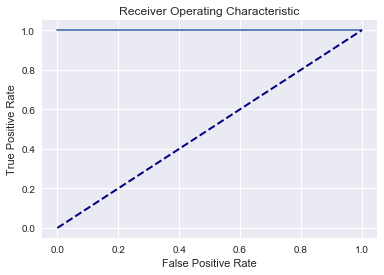

In [83]:
#model performance on training data
class_metrics(y_train, pred_knn_train)

ROC AUC Score: 0.927674690152
Accuracy Score: 0.988909057233
Precision Score: 0.935279095221
Avg Precision Score: 0.900955857505
Recall Score: 0.858827470687


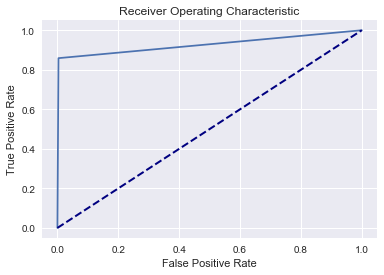

In [84]:
#model performance on test data
class_metrics(y_test, pred_knn)

In [85]:
#metric to measure KNN performance
cohen_kappa_score(y_test, pred_knn)

0.88957960225623778

### Logistic Regression

In [86]:
logit = LogisticRegression()
logit.fit(X_train, y_train)

pred_logit_train = logit.predict(X_train)
pred_logit = logit.predict(X_test)

In [87]:
#check for binary outputs to determine if thresholds need to be placed
print pred_logit
print pred_logit.min()
print pred_logit.max()

[0 0 0 ..., 0 1 0]
0
1


ROC AUC Score: 0.989530383549
Accuracy Score: 0.998848990763
Precision Score: 1.0
Avg Precision Score: 0.990105888167
Recall Score: 0.979060767098


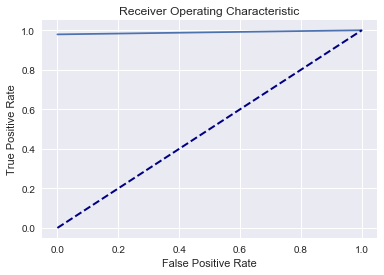

In [88]:
#model performance on training data
class_metrics(y_train, pred_logit_train)

ROC AUC Score: 0.988609715243
Accuracy Score: 0.998740507501
Precision Score: 1.0
Avg Precision Score: 0.989239461492
Recall Score: 0.977219430486


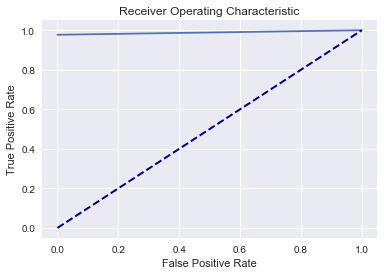

In [89]:
#model performance on test data
class_metrics(y_test, pred_logit)

In [90]:
# examine the coefficients
features_logit = pd.DataFrame(zip(df_final.columns, np.transpose(logit.coef_)))
features_logit.columns = ['Features', 'Logistic Coefficient']
features_logit.sort_values('Logistic Coefficient', inplace=True, ascending=False)
features_logit

,Features,Logistic Coefficient
0,funded_amnt,[0.0147476896687]
23,recoveries,[0.00303261577994]
20,total_pymnt,[0.000726936780985]
24,collection_recovery_fee,[0.000544954454216]
109,60 months,[2.57863949583e-05]
18,tot_cur_bal,[7.70900520906e-06]
32,AK,[6.89943697486e-07]
107,wedding,[-3.92902396552e-09]
97,educational,[-8.60475908229e-09]
80,WV,[-7.47100496747e-07]


(0, 0.00012)

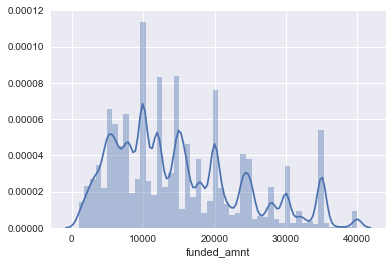

In [91]:
#Visualize relationships between Y and two strongest variables
#strongest features in this model are funded_amnt and recoveries
ax = sns.distplot(df_final['funded_amnt'])
plt.ylim(0,0.00012)

(0, 0.0014)

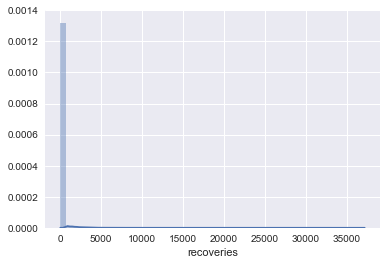

In [92]:
ax = sns.distplot(df_final['recoveries'])
plt.ylim(0,0.00140)

### Random Forest Classifer

In [93]:
# fit the model
model = RandomForestClassifier(n_estimators = 20)
    
model.fit(X_train, y_train)
pred_random_train = model.predict(X_train)
pred_random = model.predict(X_test)

In [94]:
#check for binary outputs to determine if thresholds need to be placed
print pred_random
print pred_random.min()
print pred_random.max()

[0 0 0 ..., 0 1 0]
0
1


In [95]:
print ('Train Score: '), model.score(X_train, y_train)
print ('Test Score: '), model.score(X_test, y_test)

Train Score:  0.999811075725
Test Score:  0.995802926468


In [96]:
features = X.columns
features_importances = model.feature_importances_
features_df = pd.DataFrame({'Features': features, 'Importance Score': features_importances})
features_df.sort_values('Importance Score', inplace=True, ascending=False)
features_df.head()

,Features,Importance Score
21,out_prncp,0.228983
24,collection_recovery_fee,0.219476
23,recoveries,0.113949
22,total_rec_prncp,0.098929
0,funded_amnt,0.085766


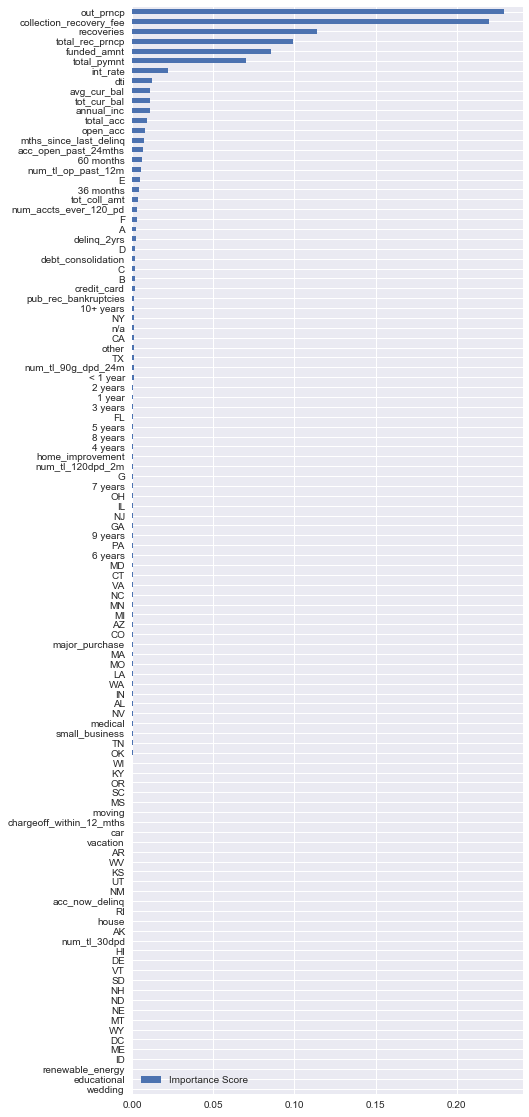

In [97]:
feature_imp = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = pd.DataFrame({'Features': features, 'Importance Score': feature_imp})
feature_importances.sort_values('Importance Score', inplace=True, ascending=True)
feature_importances.plot(kind="barh", figsize=(7,20));

ROC AUC Score: 0.998281538817
Accuracy Score: 0.999811075725
Precision Score: 1.0
Avg Precision Score: 0.998376000954
Recall Score: 0.996563077634


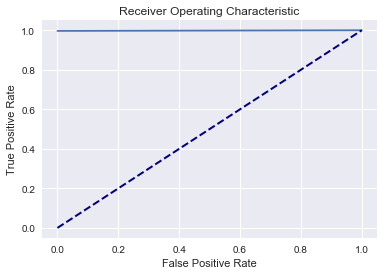

In [98]:
#model performance on training data
class_metrics(y_train, pred_random_train)

ROC AUC Score: 0.96216971207
Accuracy Score: 0.995802926468
Precision Score: 0.999710144928
Avg Precision Score: 0.964123754889
Recall Score: 0.924355108878


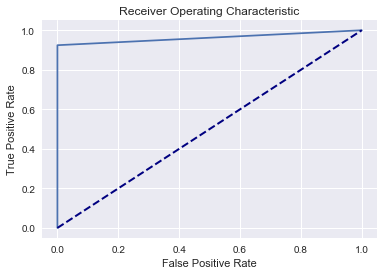

In [99]:
#model performance on test data
class_metrics(y_test, pred_random)

In [100]:
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, X, y, scoring='roc_auc')
print('CV AUC {}, Average AUC {}'.format(scores, scores.mean()))

for n_trees in range(1, 100, 10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, X, y, scoring='roc_auc')
    print('n trees: {}, CV AUC {}, Average AUC {}'.format(n_trees, scores, scores.mean()))

/Users/shahrozehusain/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


CV AUC [ 0.995794    0.99660743  0.96658882], Average AUC 0.98633008449
n trees: 1, CV AUC [ 0.67748292  0.94434127  0.82511636], Average AUC 0.815646849298
n trees: 11, CV AUC [ 0.99005753  0.99613193  0.96845862], Average AUC 0.984882692215
n trees: 21, CV AUC [ 0.99286224  0.9966124   0.96742772], Average AUC 0.985634119739
n trees: 31, CV AUC [ 0.99285973  0.99678471  0.9651318 ], Average AUC 0.984925411572
n trees: 41, CV AUC [ 0.99665178  0.99699988  0.9657699 ], Average AUC 0.986473850394
n trees: 51, CV AUC [ 0.99642535  0.99717388  0.96612993], Average AUC 0.986576385168
n trees: 61, CV AUC [ 0.99734655  0.9972391   0.96573992], Average AUC 0.986775190708
n trees: 71, CV AUC [ 0.99716537  0.9974042   0.96502221], Average AUC 0.986530594757
n trees: 81, CV AUC [ 0.99606304  0.99713301  0.96476513], Average AUC 0.985987061972
n trees: 91, CV AUC [ 0.99730129  0.99751187  0.96450715], Average AUC 0.986440101754


(0, 0.008)

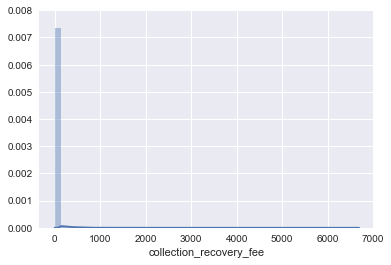

In [101]:
#Visualize relationships between Y and two strongest variables -
#strongest features in this model are out_prncp and collection_recovery_fee
ax = sns.distplot(df_final['collection_recovery_fee'])
plt.ylim(0,0.008)

(0, 0.00032)

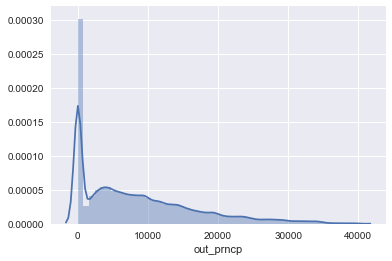

In [102]:
ax = sns.distplot(df_final['out_prncp'])
plt.ylim(0,0.00032)

## Results:

### Summary Exploratory Analysis

For in depth exploratory analysis, please scroll up. The following is a summary of the final dataset that we used for the modeling and analysis. Based on the exploratory analysis of the df_final dataset we found a number of insights including
- In the final dataset - 'df_final'of 25 variables - All variables except for loan payback terms had outliers in the dataset
- in regards to correlation between variables, I found the following highly correlated variables:
   - acc_now_delinq and num_tl_30dpd were correlated 0.79
   - num_tl_op_past_12m and acc_open_past_24mths were correlated 0.77
   - open_acc and acc_open_past_24mths were correlated 0.72
   - tot_cur_bal and avg_cur_bal were correlated 0.83
   - out_prncp and funded_amnt were correlated 0.66
   - total_rec_prncp and total_pymnt were correlated 0.97
   - collection_recovery_fee and recoveries were correlated 0.98
   - delinq_2yrs and num_tl_90g_dpd_24m were correlated were correlated 0.66
- Finally in regards to disrribution, in the finalized data set of focused variables that we used in the model - 'df_final' almost all variables were skewed right expect int_rate. The outcome column is right skewed showing a lower number of loans had defaulted/charged off than those in positive loan statuses of current, fulfilled, late payment and in grace period.

Other notable learnings include insights from dummy vars created for the final dataset such as
- The assigned loan grade is not a good indiciator if a loan is risky. It shows that the loan grade system that Lending Club utilizes is not a good indiciator if someone will default or not – usually a bad loan grade of E and below would be considered risky loans however the historgrams of the data shows that loans graded with B and C defaulted or charged off a lot more than those graded lower. 
- In regards to loan payback term periods, those who opt in for the shorter pay back term of 36 months were heavily skewd left showing that are borrowers were likely to default or be charged off in the period vs those who took loans and paid back over 60 months.
- In regards to employment rate, job stability was not a good indicator for judging if a loan was risker because borrowers who reported being employed for over 10 years were more likely to default.
- In regards to loan purpose, debt consolidation was the primary reason given by those who defaulted or charged off.


### Findings from Models

#### Reason for choosing models and metrics for measuring
The aim of this project was to create a model to identify loans that are likely to default or charge off using the data available to us. To address this we utilized a set of 3 classification machine learning models in which we determined a binary value with 0 representing current/fulfilled/late/in grade period or 1 representing default/charged off. The classification models we used were K Nearest Neighbors, Random Forest, and Logistic Regression on the data set as they are the most common tools recommended for classification problems. Random Forest works well with large number of variables while both Logistic Regression and KNN can be fine tuned to achieve better performances by adjusting factors such as weights for KNN and penalty for Logistic Regression.

In regards to metrics, the metrics I chose to measure the performance of the datasets were 
- ROC AUC Score
- Accuracy Score
- Precision Score
- Avg Precision Score
- Recall Score

In addition, upon further research, it was recommended to include the cohen kappa score for the KNN model which is used to measure its performance. "The Kappa statistic (or value) is a metric that compares an Observed Accuracy with an Expected Accuracy (random chance). The kappa statistic is used not only to evaluate a single classifier, but also to evaluate classifiers amongst themselves." In short the metric is a measure of how closely the predicted values by the machine learning classifier matched the data labeled as ground truth. (source and for greater detail on the metric: https://stats.stackexchange.com/questions/82162/cohens-kappa-in-plain-english)

The metrics above analyze all aspects of a classification model to ensure it has well rounded performance overall - beyond only looking into the commonly used accuracy score. The accuracy score paired with the presicion score, recall score and AUC score provide a better holistic image of the model and lets one understand what areas they need to improve for the model to return optimal results. 

A system with high recall but low precision returns many results, but most of its predicted labels are incorrect. A system with high precision but low recall is returning very few results, but most of its predicted labels are correct. An ideal model would return high precision and high recall on the test data set with many results(precision) and all results labeled correctly(recall).

In regards to the ROC curve, they can show how well a model is doing and can indiciated overfitting. However, paired with the other metrics we can overcome the problem to see if the model is overfit or just accurate. The following are ranges and their relevance to the score:
- .90-1 = excellent
- .80-.90 = good 
- .70-.80 = fair 
- .60-.70 = poor 
- .50-.60 = fail 

#### K Nearest Neighbors
The first model used for the project is K Nearest Neighbors. The model provided a ROC AUC Score of 0.97 which is excellent, with an accuracy score of 0.996. Based on the average precision score, the model was able to capture 97% of all the data points with a recall score of 93%. The model outdid our goal metrics initally set for the project at 75% for both accuracy and precision. 

For this model I also included the cohen kappa score for additional metric analysis. The score of 0.89 represents its accuracy against ground truth in this case the model did very well with a score of 0.89.


#### Logistic Regression Analysis Results
The second model used for the project is Logistic Regression. The model provided a ROC AUC Score of 0.99 which is excellent, with an accuracy score of 0.99. Based on the average precision score, the model was able to capture all 100% of the data points with a recall score of 98% which is also excellent. The model outdid our goal metrics initally set for the project at 75% for both accuracy and precision. The strongest variables imapcting this model were funded_amnt and out_prncp.

What was interesting with this model is that I had expected random forest to do better than this at classification. However, once you analyze the metrics below you will see that the Logistic Regression model did marginally better. 

#### Random Forest
The final model used for the project is Random Forest. The model provided a ROC AUC Score of 0.97 which is excellent, with an accuracy score of 0.996, same as KNN. However, based on the average precision score, the model was able to capture 99% of all the data points with a recall score of 93%. The strongest variables imapcting this model were funded_amnt and out_prncp. The strongest variables impacting this model were recoveries and out_prncp.

### Conclusion

Based on all the models used and the metrics to measure their sucess. The model that performed best was Logistic Regression in identifying the loans that would default based on the variables provided. 

#### Identify areas where new data could help improve the model and Future steps
The findings indicate that borrowers have a higher probability of defaulting or charging off their loans if they have have paid recoveries or have outstanding payments remaining as compared to the other independent variables. 

Next steps could include exploring the difference by removing variables like recovery fee and using the variables we did not utilize in the final df_final data set to see how that impacts loan status.In addition, it would also help to see if regularization techniques can affect the performance of the models, regularization of models are known the aid in the performance of models such as KNN.

It would be also great to carry out the same research on bank or other financial institution that offers loans and see how well the models can work.

Alternatively we can change the analysis to linear regression models to try and predict the probability that a person will default/charge off or how much to offer a borrower based on the variable data.